<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Hypothyroidism_prediction/blob/master/_Precy_Mae_Independent_Project_Core_Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothyroid prediction in patients**


---



# **1. Defining the Question**

---

## a) Specifying the Question
Creating a model that is able to predict whether an individual has hypothyroid or not.
## b) Defining the Metric for Success
Getting the most appropriate algorithm in Random forest and SVM to best predict occurance of hypothyroidism.

## c) Understanding the context
Our data was collected during a clinical camp conducted by Nairobi Hospital to test for hypothyroidism. The data collected focused on Thyroid patients.

## d) Recording the Experimental Design

### 1) Business Understanding: 
Our aim is to understand the various indicators of hypothyroidsm in patients and use that to predict whether of not a patient will have hypothyroidsm.

### 2) Reading the data to a pandas dataframe.
We read our dataset from a csv to pandas dataframe.

### 3) Checking our data: 
This involved understanding the components of our dataset, removing missing values represented by ('?'). Removing duplicated values as well.

### 4) Data cleaning:

Changing column names, removing unneeded columns.

### 5) EDA: 
Visualizing and understanding data using pandas profiling for univariate analysis and plotting for bivariate and multivariate analysis.

### 6) Implementing the solution:
Step 1, Performing adaboost, random forest, and gradient boosting for our model.

Step 2, Performing SVM using linear, polynomial and rbf algorithms.

### 7) Conclusion: 

Explaining the best found model.

### 8)Challenging the solution:

The model can be improved by balancing our classifications.


# **2. Data cleaning and preparation**

## Loading the Dataset

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
# Reading our data, top of dataset
df=pd.read_csv("/content/hypothyroid.csv")
df.head()

status age sex on_thyroxine  ... FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y  10            n   ?
1  hypothyroid  15   F            t  ...            y  17            n   ?
2  hypothyroid  24   M            f  ...            y   0            n   ?
3  hypothyroid  24   F            f  ...            y   6            n   ?
4  hypothyroid  77   M            f  ...            y  44            n   ?

[5 rows x 26 columns]

In [ ]:
# Reading bottom of dataset
df.tail()

status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
3158  negative  58   F            f  ...            y   95            n   ?
3159  negative  29   F            f  ...            y   98            n   ?
3160  negative  77   M            f  ...            y  104            n   ?
3161  negative  74   F            f  ...            y  137            n   ?
3162  negative  56   F            t  ...            y  143            n   ?

[5 rows x 26 columns]

## **Checking the data**


In [ ]:
# Checking the shape of our data
df.shape

(3163, 26)

Our dataset has 26 columns and 3163 entries

In [ ]:
# Preview our dataset columns
print ("Our columns are:   "
       ,df.columns)

Our columns are:    Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')


In [ ]:
# Taking a look at the statistical summaries
df.describe()

status   age   sex on_thyroxine  ... FTI_measured   FTI TBG_measured   TBG
count       3163  3163  3163         3163  ...         3163  3163         3163  3163
unique         2    93     3            2  ...            2   281            2    53
top     negative     ?     F            f  ...            y     ?            n     ?
freq        3012   446  2182         2702  ...         2916   247         2903  2903

[4 rows x 26 columns]

In [ ]:
# Checking our column datatypes
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

All our dataset are written as objects yet some like age should be numeric which we will deal with when we are removing missing values.

## Dealing with missing values

In [ ]:
# Checking for non missing values
df.count()

status                       3163
age                          3163
sex                          3163
on_thyroxine                 3163
query_on_thyroxine           3163
on_antithyroid_medication    3163
thyroid_surgery              3163
query_hypothyroid            3163
query_hyperthyroid           3163
pregnant                     3163
sick                         3163
tumor                        3163
lithium                      3163
goitre                       3163
TSH_measured                 3163
TSH                          3163
T3_measured                  3163
T3                           3163
TT4_measured                 3163
TT4                          3163
T4U_measured                 3163
T4U                          3163
FTI_measured                 3163
FTI                          3163
TBG_measured                 3163
TBG                          3163
dtype: int64

It appears that our dataset has no missing values but we will have to confirm that.

In [ ]:
# To confirm of no missing values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

So far, there are no missing values in our dataset. However, I have noticed some question marks in our datasets which could probably be missing values

In [ ]:
# Checking for question marks per column using the unique formula
for column in df.columns:
  print('\n')
  print( df[column].nunique())
  print(df[column].unique())



2
['hypothyroid' 'negative']


93
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


3
['M' 'F' '?']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['y' 'n']


240
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '3

* FTI seems to have a value 612 which is way higher than the rest.

* There is also a question mark (?) in age, gender,TBG and T4u. I will assume that they are null values and replace with mean in numerical columns and mode in categorical columns.


In [15]:
# Replacing our "?" with a null value
df.replace(to_replace='?', inplace=True, value=np.NaN)
print(df.isnull().sum())

status                          0
age                           446
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64


In [16]:
#  Filling our null values with mode and mean
cat_columns=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 
       'T4U_measured', 'FTI_measured', 'TBG_measured',]
       # Numerical columns
num_columns= ['age','TSH','T3','TT4','T4U','FTI','TBG'] 
# As seen earlier in our datatypes, we had all our columns as objects so we will convert them to numerical features
df[num_columns] = df[num_columns].apply(pd.to_numeric, errors='coerce',axis=1)

# applying mode on our missing categorical features
for column in cat_columns: 
  df[column]=df[column].fillna(df[column].mode().iloc[0])
# applying mean in our missing numerical features
for column in num_columns:
  df[column]=df[column].fillna(df[column].mean())

In [17]:
# Confirming that there are no missing values left
df.isnull().any()

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
TBG_measured                 False
TBG                          False
dtype: bool

We are now done removing our missing values

## Dealing with Duplicates





In [ ]:
# Displaying duplicated rows
df[df.duplicated()].head(10)

status   age sex  ...   FTI TBG_measured        TBG
53   hypothyroid  69.0   F  ...  61.0            n  31.283077
66   hypothyroid  62.0   M  ...  10.0            n  31.283077
124  hypothyroid  77.0   F  ...  49.0            n  31.283077
128  hypothyroid  79.0   F  ...  48.0            n  31.283077
131  hypothyroid  50.0   F  ...  60.0            n  31.283077
132  hypothyroid  85.0   F  ...  61.0            n  31.283077
135  hypothyroid  24.0   F  ...  28.0            n  31.283077
138  hypothyroid  15.0   F  ...  20.0            n  31.283077
145  hypothyroid  60.0   F  ...  51.0            n  31.283077
146  hypothyroid  78.0   F  ...  16.0            n  31.283077

[10 rows x 26 columns]

In [ ]:
# Checking for number of duplicated rows
print("Our dataset has ,",len(df[df.duplicated()]),"duplicated rows.")

Our dataset has , 77 duplicated rows.


We will have to drop our duplicates in order to ensure improved accuracy of our models.

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

## Outliers

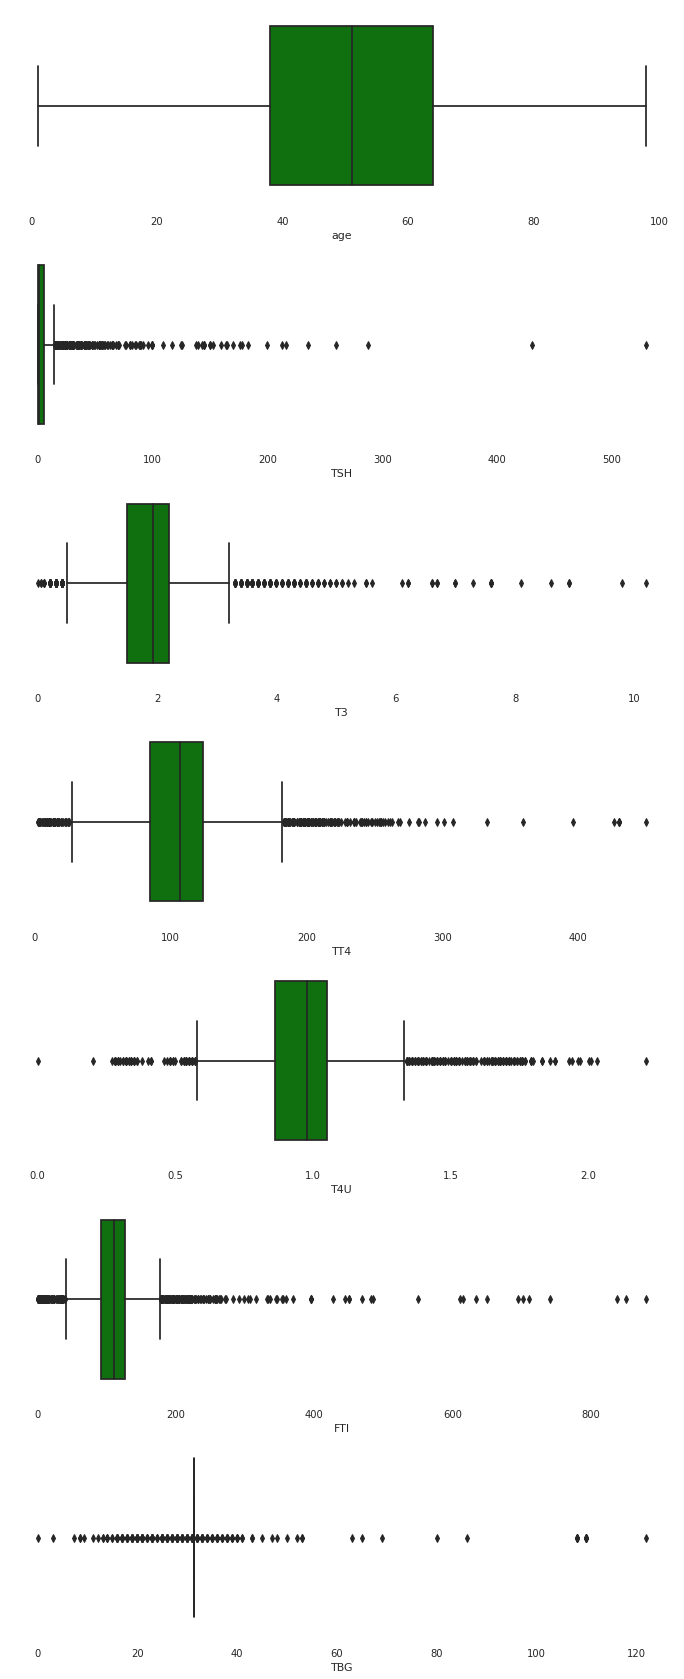

In [ ]:
# Checking for outliers using boxplots
fig, ((ax1),(ax2), (ax3),(ax4),(ax5),(ax6),(ax7)) = plt.subplots(7 ,figsize=(12, 30))
#fig.suptitle('Boxplots')
print('\n')
sns.boxplot(df['age'], ax=ax1, color='green')
sns.boxplot(df['TSH'], ax=ax2, color='green')
sns.boxplot(df['T3'], ax=ax3, color='green')
sns.boxplot(df['TT4'], ax=ax4, color='green')
sns.boxplot(df['T4U'], ax=ax5, color='green')
sns.boxplot(df['FTI'], ax=ax6, color='green')
sns.boxplot(df['TBG'], ax=ax7, color='green')

plt.show()

We will not remove outliers in our dataset as they will not affect our model much

# **3. Perform EDA**

## Univariate

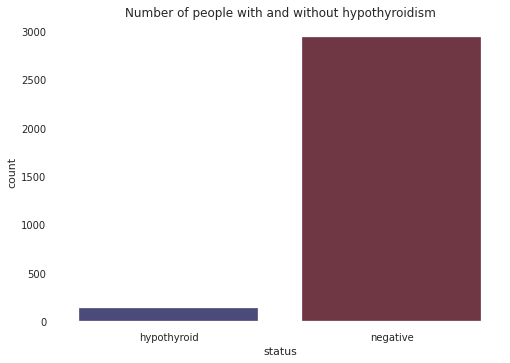

<Figure size 576x396 with 0 Axes>

In [ ]:
# Visualizing the results of those with and without hypothyroidsm
sns.countplot(x='status',data=df,palette='icefire')
plt.title('Number of people with and without hypothyroidism')
plt.show()
plt.savefig('countplot')

There are more people with hypothyroidsm recorded than those without.

In [ ]:
# Univariate analysis using pandas profiling
!pip install pandas-profiling -U

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.8.0)


In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

In [ ]:
prof

In [ ]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

Pandas profiling report summary

---
* There are more records of negative hyperthyroidsm than positive.

* The mean age is 51 and the highest recorded age is 98.

* The records for female exceed that for men. This could imply that more females get tested compared to males.

* There are more records of persons who are not on_thyroxine, query_on_thyroxine, on_antithyroid_medication, thyroid_surgery query_hypothyroid, query_hyperthyroid, pregnant, sick, tumor, lithium, goitre than those who have the above.

* There are no strong correlations in our dataset


## Bivariate

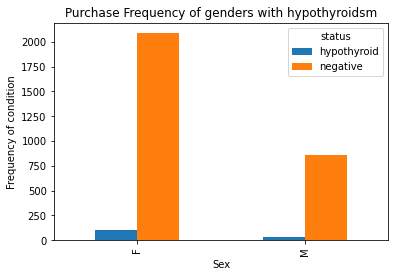

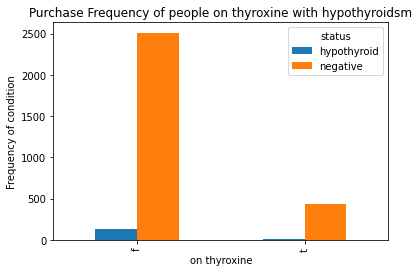

In [ ]:
# Frequency of genders with hypothyroidsm
%matplotlib inline
pd.crosstab(df.sex,df.status).plot(kind='bar')
plt.title('Purchase Frequency of genders with hypothyroidsm')
plt.xlabel('Sex')
plt.ylabel('Frequency of condition')
plt.savefig('frequency of condition amoung genders')

#
pd.crosstab(df.on_thyroxine,df.status).plot(kind='bar')
plt.title('Purchase Frequency of people on thyroxine with hypothyroidsm')
plt.xlabel('on thyroxine')
plt.ylabel('Frequency of condition')
plt.savefig('frequency of condition amoung occurrance')

From the graph above, there are more females with hyperthyroidsm than males there are also more females on tyroxine than males 

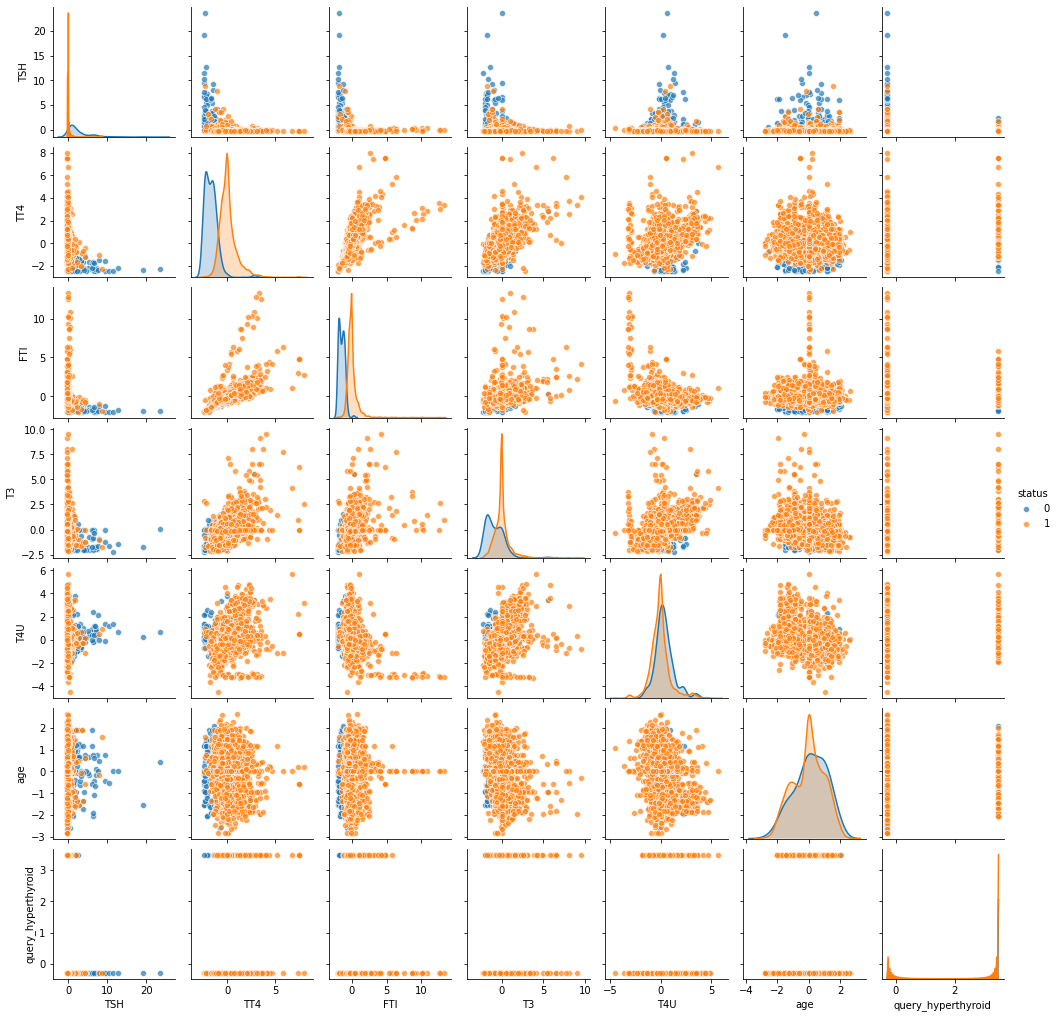

In [ ]:
# Make the pair plot Showing distribution of those with and without hyperthyroid
sns.pairplot(df, hue = 'status', diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True),size=2)

* There are much fewer records of those with hyperthyroid than those without the condition.
* There is also a lot of overlapping based on the categories so a simple logistic regression might not be the best separator. 

# **4. Splitting our dataset**

Label Encoding

In [19]:
# Applying label encoding to our categorical features to ensure they are in binary form
cat_columns=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 
       'T4U_measured', 'FTI_measured', 'TBG_measured',]
# Import label encoder
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for column in cat_columns:
  lbl_encoders[column]=LabelEncoder()
  df[column]= lbl_encoders[column].fit_transform(df[column])

In [20]:
# Confirming that our label encoding has taken place
df.head(3)

status   age  sex  on_thyroxine  ...  FTI_measured   FTI  TBG_measured        TBG
0       0  72.0    2             0  ...             1  10.0             0  31.283077
1       0  15.0    1             1  ...             1  17.0             0  31.283077
2       0  24.0    2             0  ...             1   0.0             0  31.283077

[3 rows x 26 columns]

* As shown above, our label encoding has taken place and for example our sex= 1 means that it is a male, for the boolean represented columns, 0=False and 1=True

Standardizing the data

In [21]:
# We will standardize our features because they were measured in different units
from sklearn.preprocessing import StandardScaler
StandardScaler= StandardScaler()
columns_to_scale=['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
df[columns_to_scale]=StandardScaler.fit_transform(df[columns_to_scale])
df.head(2)

status       age       sex  ...       FTI  TBG_measured           TBG
0       0  1.165928  1.500943  ... -1.822552      -0.29927 -6.458048e-16
1       0 -2.022145 -0.538354  ... -1.701507      -0.29927 -6.458048e-16

[2 rows x 26 columns]

As shown above, our dataset is already scaled, we can now select featues to use our dataset.

Feature selection

In [ ]:
# Selecting the most important features
a= df.loc[:, df.columns != 'status'] # Independent variables

b= df.iloc[:, df.columns == 'status'] # Dependent variable
from sklearn.ensemble import ExtraTreesRegressor
# Initialize
model=ExtraTreesRegressor()
model.fit(a,b)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
# Showing the feature importance rates
print(model.feature_importances_)

[2.62683619e-02 8.56770995e-03 1.49710717e-02 2.94966194e-05
 1.17368265e-02 1.01488583e-02 1.85207674e-02 1.77249544e-03
 3.92552105e-04 3.77487482e-03 6.87834154e-05 0.00000000e+00
 4.87123739e-03 1.45415372e-02 3.20400032e-01 1.91532560e-03
 4.14215227e-02 0.00000000e+00 2.44106616e-01 0.00000000e+00
 3.42532404e-02 0.00000000e+00 2.41490801e-01 5.54929681e-04
 1.92960753e-04]


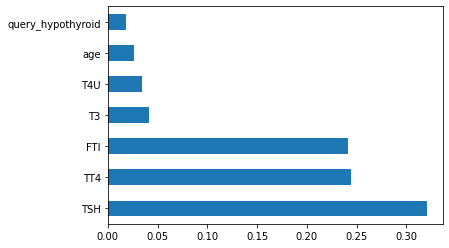

In [ ]:
# To plot graph of the top ten features that influence hypotyroidsm
feat_importances= pd.Series(model.feature_importances_, index= x.columns)
# You can take the top five important features
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

The above shows the most important features affecting hypotyroidsm.

In [22]:
# Selecting the features above
cols=['TSH','TT4','FTI','T3','T4U','age','query_hyperthyroid','status']
df=df[cols]

Train test split

In [ ]:
# Separating dependent and independent variables
X= df.loc[:, df.columns != 'status'] # Independent variables

y= df.iloc[:, df.columns == 'status'] # Dependent variable

In [ ]:
#  Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Y_test shape is:",y_test.shape,
      "X_test shape is:",X_test.shape,
      "Y_train shape is:",y_train.shape,
      "X_train shape is:",X_train.shape)

Y_test shape is: (618, 1) X_test shape is: (618, 7) Y_train shape is: (2468, 1) X_train shape is: (2468, 7)


Our train shapes and test shapes are equal so we are done splitting our dataset.

# **5. Decision Trees and Support Vector Machines**


## Base Model (Logistic Regression)


---
We will use logistic regression as our base model as the instructions recquire us not to use decision trees.


Logistic Regression Assumptions

---

* We will assume that our dependent variable is binary.
* Only the meaningful variables have been included.
* The independent variables are independent of each other with  little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* Our logistic regression has a large sample size.

In [ ]:
# Fitting our model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting test results and calculating our accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


Our base model has an accuracy of 98% . Which is really high and could cause overfitting. Let us see if other algorithms will slightly lower the accuracy.

In [ ]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.016198704103671708
Mean Squared Error: 0.016198704103671708
Root Mean Squared Error: 0.12727412975020377


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 28  11]
 [  3 884]]


The result is telling us that we have 28 + 884 correct predictions and 3+ 11 incorrect predictions.

## Part 1: Decision trees:

### Random Forest

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_predic=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predic))

Accuracy: 0.990280777537797


Random forest has increased our model accuracy to 99% yet our goal is to slightly lower the accuracy to prevent cases of overfitting.

In [ ]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predic))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predic))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predic)))

Mean Absolute Error: 0.009719222462203024
Mean Squared Error: 0.009719222462203024
Root Mean Squared Error: 0.09858611698511624


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predic)
print(confusion_matrix)

[[ 35   4]
 [  5 882]]


This means there are 35+ 882 correctly predicted values and 5+4 incorrectly predivted values.

### Adaboost

In [ ]:
# Fitting adaboost to our model
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))

Accuracy: 0.9838012958963283


Adaboost does not differ much from our base model as its accuracy is 98 just like our base model. Therefore, it has not improved our model.

In [ ]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 0.016198704103671708
Mean Squared Error: 0.016198704103671708
Root Mean Squared Error: 0.12727412975020377


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predicted)
print(confusion_matrix)

[[ 32   7]
 [  8 879]]


Our adaboost has performed similar to the base model, therefore has not offered much help

### Gradient boosting

In [ ]:
#Fitting our Gradient Boosting model
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_p = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_p))

Accuracy: 0.9935205183585313


In [ ]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_p))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_p))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_p)))

Mean Absolute Error: 0.0064794816414686825
Mean Squared Error: 0.0064794816414686825
Root Mean Squared Error: 0.08049522744528823


Gradient boosting has improved the model to 99% which is higher than our base model yet we would want to reduce our model below 98 to reduce overfitting

## Part 2: SVM



### Linear Kernel

In [ ]:
# Fitting linear Kernel model
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predicting our x test
y_predicts = svclassifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicts))

Accuracy: 0.9870410367170627


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predicts)
print(confusion_matrix)

[[ 30   9]
 [  3 884]]


In [ ]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicts))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicts))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicts)))

Mean Absolute Error: 0.012958963282937365
Mean Squared Error: 0.012958963282937365
Root Mean Squared Error: 0.11383744235943359


Our linear kernel has performed similar to our base model with an accuracy of 98 so we will not go ahead with it.

### Polynomial kernel

In [ ]:
# Fitting our polynomial kernel model
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Making predictions on our X_test
y_poly = svclassifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_poly))

Accuracy: 0.9719222462203023


In [ ]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_poly)))

Mean Absolute Error: 0.028077753779697623
Mean Squared Error: 0.028077753779697623
Root Mean Squared Error: 0.16756417809214957


Our polynomial Kernel has substancially dropped the accuracy from 98% to 97% which is good news as it has reduced the chances of overfitting of our dataset. 
Conclusion


---
This is so far the best model for our dataset.


### rbf kernel

In [ ]:
# Fitting our rbf kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Making predictions on our x test
y_rbf = svclassifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_rbf))

Accuracy: 0.9859611231101512


In [ ]:
# Our Accuracies
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_rbf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_rbf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_rbf)))

Mean Absolute Error: 0.014038876889848811
Mean Squared Error: 0.014038876889848811
Root Mean Squared Error: 0.1184857666129093


Our rbf kernel has also produced similar results to our base model which is 98, this means our model has not been improved by the rbf kernel algorithm

# **6. Conclusion**


---
The best algorithm to use to predict our model is the polynomial kernel as it produces the least accuracy of 97% which is lower than our base model which had a 98% accuracy which I thought was too high for making predictions.


# 7. Challenging the solution

---
The very high accuuracies above could be due to the highly imbalanced dataset since the records of those without hypothyroidism is so high the model will automatically predict that a patient does not have hypothyroidism.


## 1. Up-sample Minority Class

---
From Krish Naik's Github: https://github.com/krishnaik06/Handle-Imbalanced-Dataset/blob/master/Handling%20Imbalanced%20Data-%20Over%20Sampling.ipynb


In [25]:
# Showing the number of people with and without hypothyroidism
df['status'].value_counts()

1    3012
0     151
Name: status, dtype: int64

The results above prove that our dataset is not balanced.

In [24]:
# Divide by category
negative= df[df['status']==0]
hypothyroid=df[df['status']==1]
print(negative.shape, hypothyroid.shape)

(151, 8) (3012, 8)


In [26]:
# Algorithms to help in upsampling
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [27]:
# Separating our dataset into independent and dependent variables
independent= df.loc[:, df.columns != 'status'] # Independent variables

dependent= df.iloc[:, df.columns == 'status'] # Dependent variable

In [28]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
independent_res,dependent_res=smk.fit_sample(independent,dependent)

In [29]:
# Confirming that our data has been upsampled
independent_res.shape,dependent_res.shape

((6018, 7), (6018,))

Our dataset has been upsampled. 

In [33]:
# Showing the shape of the upasmpled clusters
from collections import Counter
print('Resampled dataset shape {}'.format(Counter(dependent_res)))

Resampled dataset shape Counter({0: 3009, 1: 3009})


Our dataset is now balanced

In [ ]:
# Converting our dataset to x and y to be able to run it using polynomial kernel
Y= dependent
x= independent

In [38]:
#  Split the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 0)

In [39]:
# Fitting our polynomial kernel model
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(x_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
# Making predictions on our X_test
from sklearn import metrics
y_poly = svclassifier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_poly))

Accuracy: 0.9731437598736177


As shown from the result above, upscaling has not decreased the accuracy of polynomial kernel from 97%. Therefore, our model has overcome the challenge proving it to be adequate even as an imbalanced dataset.